In [1]:
import os
os.chdir("../../..")
import deepof.data

In [2]:
%load_ext autoreload
%autoreload 2

# Formatting your data: feature extraction from motion tracking output

In [3]:
# Create and run a project. Explore different processing parameters (smoothing, imputation)

In [4]:
my_deepof_project = deepof.data.Project(
                path=os.path.join("../../Desktop/deepOF_CSDS_tutorial_dataset/"),
                arena="circular-autodetect",
                animal_ids=["B", "W"],
                video_format=".mp4",
                exclude_bodyparts=["Tail_1", "Tail_2", "Tail_tip"],
                video_scale=380,
                enable_iterative_imputation=True,
                exp_conditions={
                    '20191204_Day2_SI_JB08_Test_56': 'Stressed',
                    '20191204_Day2_SI_JB08_Test_61': 'Stressed',
                    '20191204_Day2_SI_JB08_Test_62': 'Stressed',
                    '20191204_Day2_SI_JB08_Test_54': 'Nonstressed',
                    '20191204_Day2_SI_JB08_Test_63': 'Nonstressed',
                    '20191204_Day2_SI_JB08_Test_64': 'Nonstressed'
                }
)

In [5]:
# my_deepof_project = my_deepof_project.run()

In [6]:
# Save your project to avoid laborious repetitions

In [7]:
# my_deepof_project.save("../../Desktop/deepOF_CSDS_tutorial_dataset/deepof_tutorial_saved_project")

In [8]:
# Load a previously saved project
my_deepof_project = deepof.data.load("../../Desktop/deepOF_CSDS_tutorial_dataset/deepof_tutorial_saved_project_1672667128.pkl")

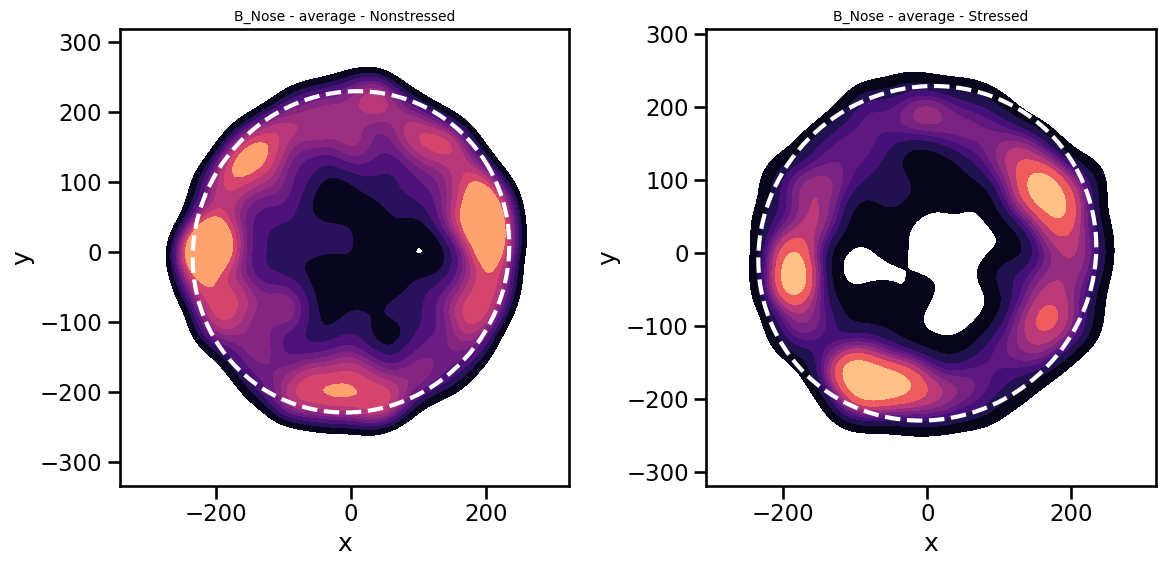

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import deepof.visuals
from matplotlib.patches import Ellipse

sns.set_context("talk")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

deepof.visuals.plot_heatmaps(
    my_deepof_project, 
    ["B_Nose"],
    center="arena", 
    exp_condition="Nonstressed",
    ax=ax1,
    show=False,
    display_arena=True,
    experiment_id="average",
)

deepof.visuals.plot_heatmaps(
    my_deepof_project, 
    ["B_Nose"],
    center="arena", 
    exp_condition="Stressed",
    ax=ax2,
    show=False,
    display_arena=True,
    experiment_id="average",
)

plt.tight_layout()
plt.show()

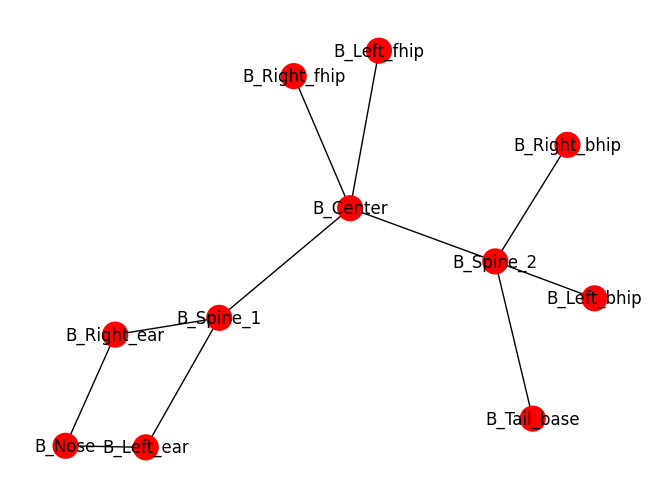

In [13]:
import networkx as nx
from deepof.utils import connect_mouse_topview

G = connect_mouse_topview(animal_ids=["B"], exclude_bodyparts=["Tail_1", "Tail_2", "Tail_tip"])

# Include a (nicer) version of this plot in the tutorial
nx.draw(G, 
        with_labels=True,
        pos=nx.spring_layout(G), 
        node_color=["red" if i.startswith("B") else "blue" for i in G.nodes()])

In [12]:
# Create a preprocessed version of the dataset we're after
pp = my_deepof_project.get_graph_dataset(
    animal_id="B",
    center="Center",
    align="Spine_1",
    preprocess=True,
    scale="standard"
)

In [128]:
my_deepof_project.get_coords(
    center="Center", align="Spine_1"
)['20191204_Day2_SI_JB08_Test_54'][["B_Center", "B_Spine_1", "W_Center", "W_Spine_1"]]

B_Center          B_Spine_1            W_Center          W_Spine_1  \
             x    y             x          y        x    y             x   
0          0.0  0.0  2.642864e-15  17.041283      0.0  0.0 -4.228987e-16   
1          0.0  0.0  4.580611e-15  16.475167      0.0  0.0 -2.062845e-16   
2          0.0  0.0 -2.826429e-15  16.446049      0.0  0.0 -4.047303e-15   
3          0.0  0.0 -2.151157e-15  15.217471      0.0  0.0 -1.694606e-16   
4          0.0  0.0  9.353887e-16  15.037661      0.0  0.0 -1.214710e-15   
...        ...  ...           ...        ...      ...  ...           ...   
14994      0.0  0.0  5.931092e-17  17.383252      0.0  0.0 -3.077880e-15   
14995      0.0  0.0  3.488156e-16  15.069470      0.0  0.0 -2.538446e-15   
14996      0.0  0.0 -5.639039e-16  19.435457      0.0  0.0  4.327347e-15   
14997      0.0  0.0 -5.639039e-16  19.435457      0.0  0.0  4.327347e-15   
14998      0.0  0.0 -5.639039e-16  19.435457      0.0  0.0  4.327347e-15   

                  
               y  
0      24.656756  
1      27.011422  
2      24.585665  
3      24.944855  
4      25.941539  
...          ...  
14994  18.672432  
14995  18.611682  
14996  18.646618  
14997  18.646618  
14998  18.646618  

[14999 rows x 8 columns]

In [114]:
pp[0].shape

(89968, 25, 66)

In [119]:
from ipywidgets import interact, IntSlider

@interact()
def plot_mouse(i=IntSlider(min=0, max=100)):

    sns.scatterplot(x=pp[0][i][0][:11], y=pp[0][i][0][11:22])
 #   sns.scatterplot(x=pp[0][i][0][33:44], y=pp[0][i][0][44:55])
#     sns.scatterplot(x=pp[0][15000 + i][0][:11], y=pp[0][15000 + i][0][11:22])
#     sns.scatterplot(x=pp[0][30000 + i][0][:11], y=pp[0][30000 + i][0][11:22])
#     sns.scatterplot(x=pp[0][45000 + i][0][:11], y=pp[0][45000 + i][0][11:22])
#     sns.scatterplot(x=pp[0][60000 + i][0][:11], y=pp[0][60000 + i][0][11:22])
#     sns.scatterplot(x=pp[0][75000 + i][0][:11], y=pp[0][75000 + i][0][11:22])
    
    plt.xlim(-3, 3)
    plt.ylim(-4, 5)
    
    plt.show()

interactive(children=(IntSlider(value=0, description='i'), Output()), _dom_classes=('widget-interact',))

In [102]:
ss = (pp[0][:25000], pp[1][:25000], pp[2][:25000], pp[3][:25000], pp[4][:25000], pp[5][:25000])

In [103]:
%%time
cons = my_deepof_project.deep_unsupervised_embedding(
    ss,
    embedding_model="VaDE",
    epochs=5,
    encoder_type="recurrent",
    n_components=15,
    latent_dim=2,
    kl_warmup=10,
    kl_annealing_mode="linear",
    batch_size=128,
    kmeans_loss=0.0,
    reg_cat_clusters=0.0,
)

2023-01-02 19:09:04.633852: I tensorflow/core/profiler/lib/profiler_session.cc:99] Profiler session initializing.
2023-01-02 19:09:04.633864: I tensorflow/core/profiler/lib/profiler_session.cc:114] Profiler session started.
2023-01-02 19:09:04.635841: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session tear down.


Epoch 1/5


2023-01-02 19:09:16.824630: W tensorflow/core/framework/dataset.cc:768] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


195/195 [==============================] - 20s 40ms/step - total_loss: 48.0959 - reconstruction_loss: 46.5789 - clustering_loss: 0.0000e+00 - prior_loss: 0.0000e+00 - kl_weight: 0.0497 - kl_divergence: -1.6296 - kmeans_loss: 1.5133 - number_of_populated_clusters: 12.2564 - confidence_in_selected_cluster: 0.2506
Epoch 2/5
195/195 [==============================] - 8s 40ms/step - total_loss: 46.9239 - reconstruction_loss: 45.7518 - clustering_loss: 0.0000e+00 - prior_loss: 0.0000e+00 - kl_weight: 0.1497 - kl_divergence: -1.5282 - kmeans_loss: 1.3436 - number_of_populated_clusters: 12.2615 - confidence_in_selected_cluster: 0.2203
Epoch 3/5
195/195 [==============================] - 8s 39ms/step - total_loss: 46.6745 - reconstruction_loss: 45.7168 - clustering_loss: 0.0000e+00 - prior_loss: 0.0000e+00 - kl_weight: 0.2497 - kl_divergence: -1.4674 - kmeans_loss: 1.2797 - number_of_populated_clusters: 12.3949 - confidence_in_selected_cluster: 0.2155
Epoch 4/5
  3/195 [........................

2023-01-02 19:09:53.342957: W tensorflow/core/framework/dataset.cc:768] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


195/195 [==============================] - 8s 41ms/step - total_loss: 46.4917 - reconstruction_loss: 45.7115 - clustering_loss: 0.0000e+00 - prior_loss: 0.0000e+00 - kl_weight: 0.3497 - kl_divergence: -1.4035 - kmeans_loss: 1.2377 - number_of_populated_clusters: 12.2872 - confidence_in_selected_cluster: 0.2097
Epoch 5/5
195/195 [==============================] - 8s 39ms/step - total_loss: 46.3276 - reconstruction_loss: 45.7086 - clustering_loss: 0.0000e+00 - prior_loss: 0.0000e+00 - kl_weight: 0.4497 - kl_divergence: -1.3545 - kmeans_loss: 1.2026 - number_of_populated_clusters: 12.3231 - confidence_in_selected_cluster: 0.2059
Epoch 1/5
  1/195 [..............................] - ETA: 19:16 - total_loss: 45.0613 - reconstruction_loss: 42.1043 - clustering_loss: -0.9841 - prior_loss: 2.7080 - kl_weight: 0.0000e+00 - kl_divergence: -1.3734 - kmeans_loss: 1.2091 - number_of_populated_clusters: 5.0000 - confidence_in_selected_cluster: 0.9879

2023-01-02 19:10:18.776785: I tensorflow/core/profiler/lib/profiler_session.cc:99] Profiler session initializing.
2023-01-02 19:10:18.776802: I tensorflow/core/profiler/lib/profiler_session.cc:114] Profiler session started.


  6/195 [..............................] - ETA: 4:14 - total_loss: 45.7700 - reconstruction_loss: 42.8695 - clustering_loss: -0.9929 - prior_loss: 2.7080 - kl_weight: 0.0013 - kl_divergence: -1.3498 - kmeans_loss: 1.1642 - number_of_populated_clusters: 3.8333 - confidence_in_selected_cluster: 0.9948    

2023-01-02 19:10:25.332829: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2023-01-02 19:10:25.336609: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session tear down.
2023-01-02 19:10:25.338958: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: /Users/lucas_miranda/PycharmProjects/deepof/unsupervised_trained_models/fit/deepof_unsupervised_VaDE_recurrent_encodings_input_type=coords_kmeans_loss=0.0_encoding=2_k=15_20230102-190904/plugins/profile/2023_01_02_19_10_25

2023-01-02 19:10:25.339675: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to /Users/lucas_miranda/PycharmProjects/deepof/unsupervised_trained_models/fit/deepof_unsupervised_VaDE_recurrent_encodings_input_type=coords_kmeans_loss=0.0_encoding=2_k=15_20230102-190904/plugins/profile/2023_01_02_19_10_25/MC-C9791E.local.trace.json.gz
2023-01-02 19:10:25.341145: I tensorflow/core/profiler

195/195 [==============================] - 20s 73ms/step - total_loss: 48.5585 - reconstruction_loss: 45.7057 - clustering_loss: -0.9891 - prior_loss: 2.7080 - kl_weight: 0.0497 - kl_divergence: -1.3288 - kmeans_loss: 1.1799 - number_of_populated_clusters: 4.0821 - confidence_in_selected_cluster: 0.9922 - lr: 0.0010


2023-01-02 19:10:32.833077: W tensorflow/core/framework/dataset.cc:768] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


Epoch 2/5
195/195 [==============================] - 8s 39ms/step - total_loss: 48.3968 - reconstruction_loss: 45.7062 - clustering_loss: -0.9894 - prior_loss: 2.7080 - kl_weight: 0.1497 - kl_divergence: -1.2649 - kmeans_loss: 1.1487 - number_of_populated_clusters: 4.0359 - confidence_in_selected_cluster: 0.9924 - lr: 0.0010
Epoch 3/5
195/195 [==============================] - 8s 39ms/step - total_loss: 48.2564 - reconstruction_loss: 45.7096 - clustering_loss: -0.9908 - prior_loss: 2.7080 - kl_weight: 0.2497 - kl_divergence: -1.2315 - kmeans_loss: 1.1272 - number_of_populated_clusters: 3.9128 - confidence_in_selected_cluster: 0.9933 - lr: 0.0010
Epoch 4/5
195/195 [==============================] - 8s 39ms/step - total_loss: 48.1114 - reconstruction_loss: 45.7073 - clustering_loss: -0.9912 - prior_loss: 2.7080 - kl_weight: 0.3497 - kl_divergence: -1.2148 - kmeans_loss: 1.1041 - number_of_populated_clusters: 3.8256 - confidence_in_selected_cluster: 0.9937 - lr: 0.0010
Epoch 5/5
195/195 [

2023-01-02 19:11:04.287833: W tensorflow/core/framework/dataset.cc:768] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


In [104]:
tt = cons.encoder([ss[0], ss[1]])
qq = cons.grouper([ss[0], ss[1]])

In [105]:
import umap
umap = tt.numpy()#umap.UMAP(n_components=2, n_neighbors=250).fit_transform(tt.numpy())

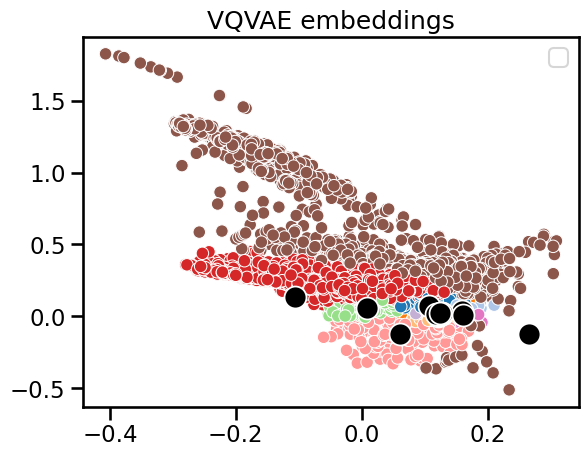

In [106]:
means = cons.get_gmm_params['means'].numpy()

sns.scatterplot(x=umap[:, 0], y=umap[:, 1], hue=qq.numpy().argmax(axis=1), palette="tab20")
means = cons.get_layer("grouper").get_layer("gaussian_mixture_latent").c_mu.numpy()
sns.scatterplot(x=means[:,0], y=means[:,1], s=250, c="black")

plt.title("VQVAE embeddings")

plt.legend("")
plt.show()

In [ ]:
from IPython import display

video = deepof.visuals.animate_skeleton(
    my_deepof_project,
    #embedding=emb,
    #cluster_assignments=clust_ass,
    #animal_id="W",
    experiment_id="20191204_Day2_SI_JB08_Test_54",
    frame_limit=250,
    # selected_cluster=0,
    dpi=60,
    # center="Center",
    # align="Spine_1",
    #embedding=[emb_B, emb_W],
    save="SAB_multi_animal_example.mp4",
)

html = display.HTML(video)
display.display(html)
plt.close()

In [ ]:
# Single animal display

In [ ]:
from sklearn.decomposition import PCA

emb = PCA(n_components=3).fit_transform(my_deepof_project.get_coords().filter_id("B")['20191204_Day2_SI_JB08_Test_56'])

In [ ]:
from IPython import display

video = deepof.visuals.animate_skeleton(
    my_deepof_project,
    animal_id="B",
    embedding=emb,
    experiment_id="20191204_Day2_SI_JB08_Test_56",
    frame_limit=750,
    dpi=60,
)

html = display.HTML(video)
display.display(html)
plt.close()

In [ ]:
emb = PCA(n_components=3).fit_transform(my_deepof_project.get_coords(center="Center", align="Spine_1").filter_id("B")['20191204_Day2_SI_JB08_Test_56'])

In [ ]:
from IPython import display

video = deepof.visuals.animate_skeleton(
    my_deepof_project,
    center="Center",
    align="Spine_1",
    animal_id="B",
    embedding=emb,
    experiment_id="20191204_Day2_SI_JB08_Test_56",
    frame_limit=750,
    dpi=60,
)

html = display.HTML(video)
display.display(html)
plt.close()

In [ ]:
# Get and plot coordinates, distances, angles, and areas. Try and visualizing different centering and rotations

In [ ]:
my_deepof_project.get_coords(polar=True)['20191204_Day2_SI_JB08_Test_54']

In [ ]:
my_deepof_project.get_distances()['20191204_Day2_SI_JB08_Test_54']

In [ ]:
my_deepof_project.get_angles()['20191204_Day2_SI_JB08_Test_54']

In [ ]:
my_deepof_project.get_areas()

In [ ]:
my_deepof_project.get_areas()['20191204_Day2_SI_JB08_Test_54']

In [ ]:
# Show how to merge different feature objects

my_deepof_project.get_coords().pca()